<a href="https://colab.research.google.com/github/LucasMirandaD/Gestion-de-Datos/blob/main/LM_Competencia_Ausentismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ayuda -> Caso_Ausentismo_de_Turnos_2023

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
datos= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/datos_train.csv',delimiter=',',decimal='.')

# Preprocesamiento

In [3]:
datos.head(2)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,30846,29333,F,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,40,62,0,1,0,0,0,0,0
1,2,55326,29080,M,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,40,56,0,0,0,0,0,0,0


In [4]:
datos.shape

(86000, 15)

In [5]:
datos.ausente.value_counts()

0    68230
1    17770
Name: ausente, dtype: int64

<Axes: >

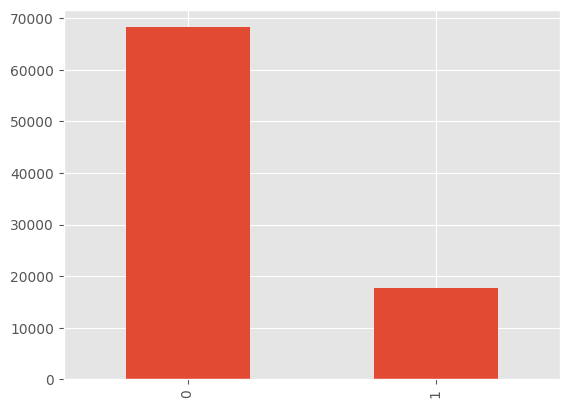

In [6]:
datos.ausente.value_counts().plot(kind='bar')

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 86000 non-null  int64 
 1   id_paciente        86000 non-null  int64 
 2   id_turno           86000 non-null  int64 
 3   sexo               86000 non-null  object
 4   dia_reserva_turno  86000 non-null  object
 5   dia_turno          86000 non-null  object
 6   cod_barrio         86000 non-null  int64 
 7   edad               86000 non-null  int64 
 8   plan_social        86000 non-null  int64 
 9   hipertension       86000 non-null  int64 
 10  diabetes           86000 non-null  int64 
 11  alcoholismo        86000 non-null  int64 
 12  discapacidades     86000 non-null  int64 
 13  sms_recibidos      86000 non-null  int64 
 14  ausente            86000 non-null  int64 
dtypes: int64(12), object(3)
memory usage: 9.8+ MB


In [8]:
datos.describe()

,id,id_paciente,id_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
count,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000,86000.000000
mean,43000.500000,31123.719977,46625.973116,42.601547,36.982860,0.098372,0.196651,0.071151,0.029837,0.022291,0.289302,0.206628
std,24826.205912,17964.921826,27585.167343,22.416531,23.100174,0.297819,0.397469,0.257079,0.170139,0.160967,0.453441,0.404889
min,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21500.750000,15614.000000,23087.750000,26.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43000.500000,31018.500000,45761.500000,40.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64500.250000,46589.000000,69626.250000,61.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,86000.000000,62299.000000,110522.000000,81.000000,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


In [9]:
# # Convertir las variables a categóricas
datos['sexo'] = datos['sexo'].astype('category')
datos['plan_social'] = datos['plan_social'].astype('category')
datos['hipertension'] = datos['hipertension'].astype('category')
datos['diabetes'] = datos['diabetes'].astype('category')
datos['alcoholismo'] = datos['alcoholismo'].astype('category')
datos['discapacidades'] = datos['discapacidades'].astype('category')
datos['sms_recibidos'] = datos['sms_recibidos'].astype('category')
datos['ausente'] = datos['ausente'].astype('category')

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86000 entries, 0 to 85999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 86000 non-null  int64   
 1   id_paciente        86000 non-null  int64   
 2   id_turno           86000 non-null  int64   
 3   sexo               86000 non-null  category
 4   dia_reserva_turno  86000 non-null  object  
 5   dia_turno          86000 non-null  object  
 6   cod_barrio         86000 non-null  int64   
 7   edad               86000 non-null  int64   
 8   plan_social        86000 non-null  category
 9   hipertension       86000 non-null  category
 10  diabetes           86000 non-null  category
 11  alcoholismo        86000 non-null  category
 12  discapacidades     86000 non-null  category
 13  sms_recibidos      86000 non-null  category
 14  ausente            86000 non-null  category
dtypes: category(8), int64(5), object(2)
memory usage: 5.3

In [10]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_paciente', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'sexo', 'edad', 'plan_social', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# Reordenar las columnas utilizando reindex
datos = datos.reindex(columns=new_columns)

# Mostrar los datos actualizados
datos.head(5)

,id,id_paciente,id_turno,cod_barrio,dia_reserva_turno,dia_turno,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente
0,1,30846,29333,40,2019-08-12 18:38:08+00:00,2019-08-12 00:00:00+00:00,F,62,0,1,0,0,0,0,0
1,2,55326,29080,40,2019-08-12 16:08:27+00:00,2019-08-12 00:00:00+00:00,M,56,0,0,0,0,0,0,0
2,3,15723,29116,46,2019-08-12 16:19:04+00:00,2019-08-12 00:00:00+00:00,F,62,0,0,0,0,0,0,0
3,4,9019,29300,55,2019-08-12 17:29:31+00:00,2019-08-12 00:00:00+00:00,F,8,0,0,0,0,0,0,0
4,5,23942,29074,40,2019-08-12 16:07:23+00:00,2019-08-12 00:00:00+00:00,F,56,0,1,1,0,0,0,0


In [11]:
datos['sexo'] = datos['sexo'].replace({'F': 0, 'M': 1})

In [12]:
# Convertir las columnas de fecha en formato datetime
datos['dia_reserva_turno'] = pd.to_datetime(datos['dia_reserva_turno'])
datos['dia_turno'] = pd.to_datetime(datos['dia_turno'])

# Extraer el mes y el día de las columnas de fecha
datos['mes_reserva_turno'] = datos['dia_reserva_turno'].dt.month
datos['dia_reserva_turno'] = datos['dia_reserva_turno'].dt.day

datos['mes_turno'] = datos['dia_turno'].dt.month
datos['dia_turno'] = datos['dia_turno'].dt.day

Normalizacion de datos numericos

In [13]:
# Seleccionar solo las características numéricas
numeric_features = ['edad', 'sms_recibidos']
numeric_data = datos[numeric_features]

# Crear el objeto del escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos
normalized_data = scaler.fit_transform(numeric_data)

# Crear un nuevo DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# Reemplazar las columnas numéricas en el DataFrame original con las columnas normalizadas
datos[numeric_features] = normalized_df

# # Ver los datos normalizados
# print(datos)

Normalizacion de la fecha

In [14]:
# columnas_fecha = [ 'dia_turno'] #'dia_reserva_turno',

# # Función para normalizar una columna
# normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

# # Aplicar la normalización a las columnas de fecha
# datos[columnas_fecha] = datos[columnas_fecha].apply(normalize_column)

# # print(datos)


In [15]:
datos.head(5)

,id,id_paciente,id_turno,cod_barrio,dia_reserva_turno,dia_turno,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos,ausente,mes_reserva_turno,mes_turno
0,1,30846,29333,40,12,12,0,0.539130,0,1,0,0,0,0.0,0,8,8
1,2,55326,29080,40,12,12,1,0.486957,0,0,0,0,0,0.0,0,8,8
2,3,15723,29116,46,12,12,0,0.539130,0,0,0,0,0,0.0,0,8,8
3,4,9019,29300,55,12,12,0,0.069565,0,0,0,0,0,0.0,0,8,8
4,5,23942,29074,40,12,12,0,0.486957,0,1,1,0,0,0.0,0,8,8


In [16]:
X=datos.iloc[:,6:14] #antes --> X=datos.iloc[:,0:11] incluia el id
X.head(5)

,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,0,0.539130,0,1,0,0,0,0.0
1,1,0.486957,0,0,0,0,0,0.0
2,0,0.539130,0,0,0,0,0,0.0
3,0,0.069565,0,0,0,0,0,0.0
4,0,0.486957,0,1,1,0,0,0.0


In [17]:
y=datos.iloc[:,14:15]
y.head(7)

,ausente
0,0
1,0
2,0
3,0
4,0
5,0
6,1


**Submuestreo + Sobremuestreo**

In [18]:
# Submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=80)
X_under, y_under = under_sampler.fit_resample(datos.drop('ausente', axis=1), datos['ausente'])

# Sobre muestreo de la clase minoritaria utilizando el subconjunto submuestreado
over_sampler = SMOTE(random_state=80)
X_balanced, y_balanced = over_sampler.fit_resample(X_under, y_under)


In [19]:
X_balanced = X_balanced.iloc[:,6:14]
X_balanced.head(5)

,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,1,0.173913,0,0,0,0,0,0.0
1,0,0.060870,0,0,0,0,0,0.0
2,0,0.452174,0,0,0,0,0,0.0
3,0,0.434783,0,0,0,0,0,0.0
4,1,0.286957,0,0,0,1,0,0.0


<Axes: >

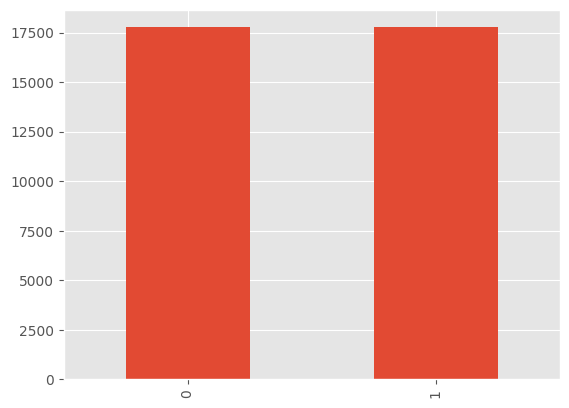

In [20]:
muestraDat = pd.concat([X_balanced, y_balanced], axis=1)
muestraDat.ausente.value_counts().plot(kind='bar')

**Submuestreo de la clase mayoritaria**

**NearMiss**

In [21]:
# Aplica NearMiss para realizar el submuestreo de la clase mayoritaria
nm = NearMiss()
X_subsampled, y_subsampled = nm.fit_resample(X, y)

# Crea un nuevo DataFrame con los datos submuestreados
datos_subsampled = pd.concat([X_subsampled, y_subsampled], axis=1)

**Undersampler** Para equilibrar clases

In [22]:
# Aplicar submuestreo solo al conjunto de entrenamiento
undersampler = RandomUnderSampler(random_state=80)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# datos_resampled = pd.concat([X_resampled, y_resampled], axis=1)

**Division del conjunto de datos**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,test_size=0.3,random_state=80)

In [24]:
# # NearMiss
# # X_train=X_train_subsampled
# # y_train=y_train_subsampled

# # UnderSampler
# X_train=X_train_resampled
# y_train=y_train_resampled

<Axes: >

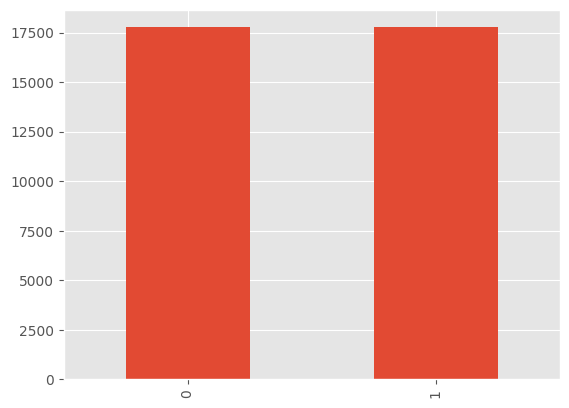

In [25]:
datos_subsampled.ausente.value_counts().plot(kind='bar')

# Clasificadores

In [26]:
modelo = DecisionTreeClassifier()
modeloLR = LogisticRegression()
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_rf = RandomForestClassifier()

## **Random Forest**

In [27]:
# Diccionario de hiperparámetros para la calibración del modelo
rf_param = {
    # 'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'n_estimators': [10], #antes 10
    'criterion': ['gini', 'entropy'],  # Criterio de selección de características
    'max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en cada hoja del árbol
}

In [28]:
# Calibración del modelo con GridSearchCV
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=80)
grid_rf = GridSearchCV(
    modelo_rf,
    param_grid=rf_param,
    cv=kfold,
    verbose=1
)
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10]},
             verbose=1)

In [29]:
# Obtener los mejores parámetros y el mejor estimador
best_params_rf = grid_rf.best_params_
best_estimator_rf = grid_rf.best_estimator_

In [30]:
# Entrenar el modelo final con los mejores parámetros
modelo_rf_final = best_estimator_rf.fit(X_train, y_train)

In [31]:
# Validación del modelo final
y_pred_rf = modelo_rf_final.predict(X_test)

In [32]:
# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de confusión (Random Forest):\n", conf_matrix_rf)

Matriz de confusión (Random Forest):
 [[4024 1271]
 [3393 1974]]


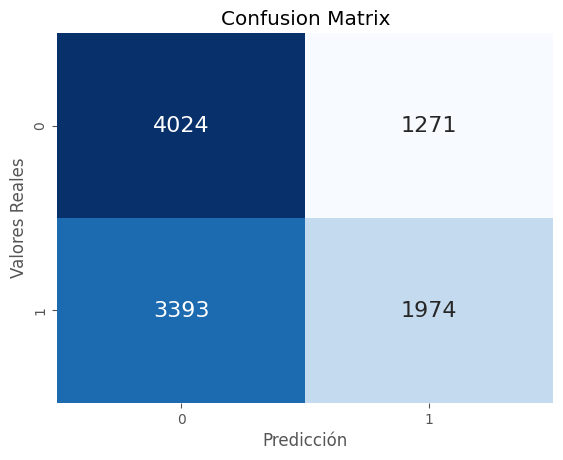

In [33]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_rf, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [34]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_rf)

Accuracy (Random Forest): 0.5625586193959857
Precision (Random Forest): 0.6083204930662558
Recall (Random Forest): 0.36780324203465625
F1 Score (Random Forest): 0.45843009753831865
Kappa score:  0.12742294107979613


In [35]:
grid_rf.best_score_

0.5721516031272585

## DecisionTreeClasifier

In [36]:
tree_param = {
    'criterion': ['entropy','gini'],
    'max_depth': range(1,10),
    'min_samples_leaf': range(1,10)
}

In [37]:
grid = GridSearchCV(
    modelo,
    param_grid= tree_param,
    # cv=10,
    cv=kfold,
    # scoring='f1',
    verbose=1
)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=80, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10)},
             verbose=1)

In [38]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}

In [39]:
grid.best_score_

0.5722726667416547

In [40]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [41]:
modelo_f=grid.best_estimator_

Prediccion

In [42]:
y_pred_Tree = modelo_f.predict(X_test)

In [43]:
kappa = cohen_kappa_score(y_test, y_pred_Tree)
print("Kappa score: ", kappa)

Kappa score:  0.13320755078915525


In [44]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_Tree)
precision_rf = precision_score(y_test, y_pred_Tree)
recall_rf = recall_score(y_test, y_pred_Tree)
f1_score_rf = f1_score(y_test, y_pred_Tree)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)

Accuracy (Random Forest): 0.5659350966047646
Precision (Random Forest): 0.5898371018721128
Recall (Random Forest): 0.45202161356437487
F1 Score (Random Forest): 0.5118143459915612


In [45]:
# Matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_Tree)
print("Matriz de confusión (Random Forest):\n", conf_matrix_tree)

Matriz de confusión (Random Forest):
 [[3608 1687]
 [2941 2426]]


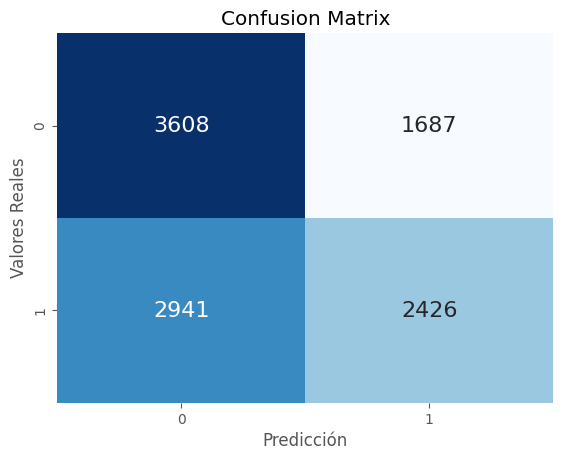

In [46]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_Tree, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [47]:

# Obtener la importancia de las características
feature_importances = modelo_f.feature_importances_

# Crear un DataFrame con la importancia de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(feature_importance_df.head())

# Seleccionar solo las características más importantes
selected_features = feature_importance_df['Feature'].values[:5]  # seleccionar las 5 características más importantes

# Filtrar el conjunto de datos original con las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          Feature  Importance
1            edad    0.439979
7   sms_recibidos    0.415715
2     plan_social    0.040401
6  discapacidades    0.025375
3    hipertension    0.024318


## LogisticRegression

In [48]:
# Crear el modelo de Logistic Regression
model_lr = LogisticRegression(solver='liblinear') # 

# Definir los hiperparámetros a ajustar
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Realizar Grid Search para encontrar los mejores hiperparámetros
grid_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, scoring='roc_auc', cv=5)
grid_lr.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
final_model_lr = grid_lr.best_estimator_

# Realizar predicciones en los datos de prueba utilizando el mejor modelo
y_pred_lr = final_model_lr.predict(X_test)

# Probabilidades de predicción
y_pred_proba = final_model_lr.predict_proba(X_test)[:, 1]



In [83]:
# Evaluar el rendimiento del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))



Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      5295
           1       0.59      0.43      0.50      5367

    accuracy                           0.56     10662
   macro avg       0.57      0.56      0.55     10662
weighted avg       0.57      0.56      0.55     10662



In [84]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[3658 1637]
 [3037 2330]]


In [50]:
# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.5898542363511636


In [51]:
# Mejores hiperparámetros encontrados por Grid Search
print("Best Parameters:", grid_lr.best_params_)

print("Best Score:", grid_lr.best_score_)

kappa = cohen_kappa_score(y_test, y_pred_lr)
print("Kappa score: ", kappa)

Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Score: 0.5892300427133994
Kappa score:  0.12475368971463885


In [52]:
# Otras métricas de evaluación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_rlr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)

print("Accuracy (DecisionTreeClasifier):", accuracy_lr)
print("Precision (DecisionTreeClasifier):", precision_lr)
print("Recall (DecisionTreeClasifier):", recall_rlr)
print("F1 Score (DecisionTreeClasifier):", f1_score_lr)

Accuracy (DecisionTreeClasifier): 0.5616207090602139
Precision (DecisionTreeClasifier): 0.5873456012099824
Recall (DecisionTreeClasifier): 0.43413452580585055
F1 Score (DecisionTreeClasifier): 0.49925005356760227


In [53]:
# Matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión (Random Forest):\n", conf_matrix_lr)

Matriz de confusión (Random Forest):
 [[3658 1637]
 [3037 2330]]


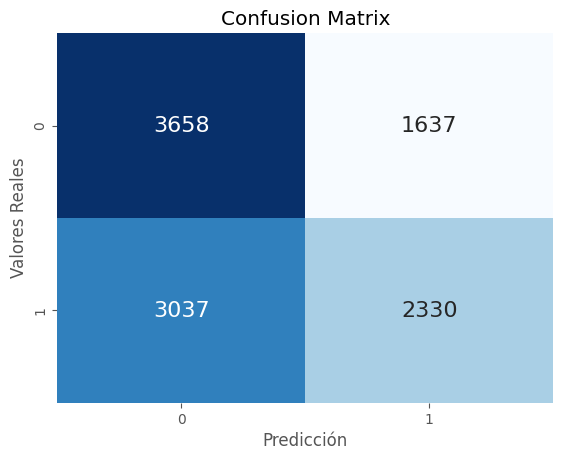

In [54]:
labels = [0, 1]
cm=confusion_matrix(y_test, y_pred_lr, labels=labels)
ax= plt.subplot()
sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

# Leer nuevas instancias a predecir

In [55]:
nuevas_instancias_pd= pd.read_csv('https://raw.githubusercontent.com/profcarlosamartinez/mineria_datos/main/ausentismo_2023/nuevas_instancias_a_predecir.csv',delimiter=',',decimal='.')

In [56]:
nuevas_instancias_pd.shape

(24527, 14)

In [57]:
nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].replace({'F': 0, 'M': 1})

In [58]:
nuevas_instancias_pd.head(5)

,id,id_paciente,id_turno,sexo,dia_reserva_turno,dia_turno,cod_barrio,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,1,62227,4649,1,2019-07-15 17:14:49+00:00,2019-09-14 00:00:00+00:00,39,15,0,0,0,0,0,1
1,2,43027,12844,1,2019-08-02 07:29:05+00:00,2019-09-21 00:00:00+00:00,39,15,0,0,0,0,0,1
2,3,36016,97746,1,2019-09-14 08:41:06+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0
3,4,60526,7833,0,2019-07-25 17:47:25+00:00,2019-09-14 00:00:00+00:00,39,11,0,0,0,0,0,1
4,5,2706,97985,0,2019-09-14 09:25:07+00:00,2019-09-14 00:00:00+00:00,39,1,0,0,0,0,0,0


In [59]:
nuevas_instancias_pd['sexo'] = nuevas_instancias_pd['sexo'].astype('category')
nuevas_instancias_pd['edad'] = nuevas_instancias_pd['edad'].astype('category')
nuevas_instancias_pd['plan_social'] = nuevas_instancias_pd['plan_social'].astype('category')
nuevas_instancias_pd['hipertension'] = nuevas_instancias_pd['hipertension'].astype('category')
nuevas_instancias_pd['diabetes'] = nuevas_instancias_pd['diabetes'].astype('category')
nuevas_instancias_pd['alcoholismo'] = nuevas_instancias_pd['alcoholismo'].astype('category')
nuevas_instancias_pd['discapacidades'] = nuevas_instancias_pd['discapacidades'].astype('category')
nuevas_instancias_pd['sms_recibidos'] = nuevas_instancias_pd['sms_recibidos'].astype('category')
# nuevas_instancias_pd['ausente'] = nuevas_instancias_pd['ausente'].astype('category')


In [60]:
# Especificar el nuevo orden de las columnas
new_columns = ['id', 'id_paciente', 'id_turno', 'cod_barrio', 'dia_reserva_turno', 'dia_turno', 'sexo', 'edad', 'plan_social', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos', 'ausente']

# Convertir las columnas de fecha en formato datetime
nuevas_instancias_pd['dia_reserva_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_reserva_turno'])
nuevas_instancias_pd['dia_turno'] = pd.to_datetime(nuevas_instancias_pd['dia_turno'])

# Extraer el mes y el día de las columnas de fecha
nuevas_instancias_pd['mes_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.month
nuevas_instancias_pd['dia_reserva_turno'] = nuevas_instancias_pd['dia_reserva_turno'].dt.day

nuevas_instancias_pd['mes_turno'] = nuevas_instancias_pd['dia_turno'].dt.month
nuevas_instancias_pd['dia_turno'] = nuevas_instancias_pd['dia_turno'].dt.day

In [61]:
# Reordenar las columnas utilizando reindex
nuevas_instancias_pd = nuevas_instancias_pd.reindex(columns=new_columns)
nuevas_instancias_pd = nuevas_instancias_pd[['sexo', 'edad', 'plan_social', 'hipertension', 'diabetes', 'alcoholismo', 'discapacidades', 'sms_recibidos']] #'dia_reserva_turno','dia_turno',

nuevas_instancias_pd.tail(2)

,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
24525,0,38,0,0,0,0,0,1
24526,0,54,0,0,0,0,0,1


Normalizacion de numericos

In [82]:
# Seleccionar solo las características numéricas
numeric_features = ['edad', 'sms_recibidos']
numeric_data = nuevas_instancias_pd[numeric_features]

# Crear el objeto del escalador
scaler = MinMaxScaler()

# Ajustar y transformar los datos
normalized_data = scaler.fit_transform(numeric_data)

# Crear un nuevo DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_data, columns=numeric_features)

# Reemplazar las columnas numéricas en el DataFrame original con las columnas normalizadas
nuevas_instancias_pd[numeric_features] = normalized_df
nuevas_instancias_pd.head(3)
# # Ver los datos normalizados
# print(nuevas_instancias_pd)

,sexo,edad,plan_social,hipertension,diabetes,alcoholismo,discapacidades,sms_recibidos
0,1,0.137931,0,0,0,0,0,1.0
1,1,0.137931,0,0,0,0,0,1.0
2,1,0.017241,0,0,0,0,0,0.0


Normalizacion de Fecha

In [63]:
# columnas_fecha = [ 'dia_turno'] #'dia_reserva_turno',

# # Función para normalizar una columna
# normalize_column = lambda x: (x - x.min()) / (x.max() - x.min())

# # Aplicar la normalización a las columnas de fecha
# nuevas_instancias_pd[columnas_fecha] = nuevas_instancias_pd[columnas_fecha].apply(normalize_column)

# # print(nuevas_instancias_pd)

# Metricas

RF

In [81]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)


print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_rf)

Accuracy (Random Forest): 0.5625586193959857
Precision (Random Forest): 0.6083204930662558
Recall (Random Forest): 0.36780324203465625
F1 Score (Random Forest): 0.45843009753831865
Kappa score:  0.12742294107979613


DTC

In [65]:
# Otras métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_Tree)
precision_rf = precision_score(y_test, y_pred_Tree)
recall_rf = recall_score(y_test, y_pred_Tree)
f1_score_rf = f1_score(y_test, y_pred_Tree)
kappa_dtc = cohen_kappa_score(y_test, y_pred_Tree)

print("Accuracy (Random Forest):", accuracy_rf)
print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1 Score (Random Forest):", f1_score_rf)
print("Kappa score: ", kappa_dtc)

Accuracy (Random Forest): 0.5659350966047646
Precision (Random Forest): 0.5898371018721128
Recall (Random Forest): 0.45202161356437487
F1 Score (Random Forest): 0.5118143459915612
Kappa score:  0.13320755078915525


LR

In [66]:
# Otras métricas de evaluación
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_rlr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
kappa_lr = cohen_kappa_score(y_test, y_pred_lr)

print("Accuracy (DecisionTreeClasifier):", accuracy_lr)
print("Precision (DecisionTreeClasifier):", precision_lr)
print("Recall (DecisionTreeClasifier):", recall_rlr)
print("F1 Score (DecisionTreeClasifier):", f1_score_lr)
print("Kappa score: ", kappa_lr)

Accuracy (DecisionTreeClasifier): 0.5616207090602139
Precision (DecisionTreeClasifier): 0.5873456012099824
Recall (DecisionTreeClasifier): 0.43413452580585055
F1 Score (DecisionTreeClasifier): 0.49925005356760227
Kappa score:  0.12475368971463885


# Seleccion de modelo

In [67]:
# modelo = final_model_lr #logisticRegression
# modelo = modelo_f #DessisionTreeClassifier
modelo = modelo_rf_final #RandomForest

# Clasificacion


In [68]:
prediccion_nuevos_individuos = modelo.predict(nuevas_instancias_pd)

In [69]:
datos_clasificados = pd.DataFrame(prediccion_nuevos_individuos)

In [70]:
datos_clasificados.index = datos_clasificados.index + 1

In [71]:
datos_clasificados.tail(3)

,0
24525,1
24526,1
24527,0


In [72]:
datos_clasificados.columns = ['Predicted']
datos_clasificados.index.names = ['id']

In [73]:
datos_clasificados.columns

Index(['Predicted'], dtype='object')

In [74]:
datos_clasificados.head(2)

,Predicted
id,
1,1
2,1


**Matriz de Confusion**

In [75]:
# # Matriz de confusión modelo elegido
# conf_matrix_final = confusion_matrix(y_test, prediccion_nuevos_individuos)
# print("Matriz de confusión (Modelo:):\n", conf_matrix_final)

In [76]:
# labels = [0, 1]
# cm=confusion_matrix(y_test, prediccion_nuevos_individuos, labels=labels)
# ax= plt.subplot()
# sns.heatmap(cm, cmap="Blues", annot=True,annot_kws={"size": 16}, cbar=False, fmt='g'); 
# ax.set_xlabel('Predicción');ax.set_ylabel('Valores Reales'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [77]:
y_pred = prediccion_nuevos_individuos

In [78]:
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Matriz de confusión:\n", conf_matrix)

In [79]:
from google.colab import files

In [80]:
datos_clasificados.to_csv('predicted.csv',sep=',')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>